## Project Introduction

Analyze AliExpress furniture sales to study pricing/discount effects and predict sold using product attributes.

## Dataset Overview

Rows: ~2,000 products

Columns:

productTitle — item name

originalPrice — price before discount

price — current selling price

sold — units sold

tagText — extra tags (e.g., Free shipping)

# Step 1: Data Collection

In [2]:

import pandas as pd


DATA = r"D:\intership project\project 4\ecommerce_furniture_dataset_2024.csv"

# Load
df = pd.read_csv(DATA)

display(df.head(10))        
                  


,productTitle,originalPrice,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,NaN,$46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,NaN,$169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,$39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",NaN,$111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,Free shipping
5,"3 Pieces Patio Furniture Set, Outdoor Swivel G...","$1,294.04",$123.4,53,Free shipping
6,5-Piece Patio Furniture Set Outdoor Couch with...,NaN,$198.31,1,Free shipping
7,"Living Room Furniture, Modern 3-Piece Includin...","$1,474.17",$734.58,5,Free shipping
8,TV Stand Dresser For Bedroom With 5 Fabric Dra...,NaN,$43.96,3,NaN
9,Outdoor Furniture Set 3 Pieces Wicker Patio Fu...,NaN,$233.3,0,Free shipping


In [3]:
print("Shape:", df.shape)   
df.info() 

Shape: (2000, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   productTitle   2000 non-null   object
 1   originalPrice  487 non-null    object
 2   price          2000 non-null   object
 3   sold           2000 non-null   int64 
 4   tagText        1997 non-null   object
dtypes: int64(1), object(4)
memory usage: 78.3+ KB


## Step 2: Data Preprocessing


In [4]:
#  Clean price columns 
df['price'] = df['price'].replace('[^\d.]', '', regex=True).astype(float)
df['originalPrice'] = df['originalPrice'].replace('[^\d.]', '', regex=True)

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\kande\AppData\Local\Temp\ipykernel_15504\1261457291.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['price'] = df['price'].replace('[^\d.]', '', regex=True).astype(float)
C:\Users\kande\AppData\Local\Temp\ipykernel_15504\1261457291.py:3: SyntaxWarning: invalid escape sequence '\d'
  df['originalPrice'] = df['originalPrice'].replace('[^\d.]', '', regex=True)


In [5]:
# Convert to numeric, handle errors
df['originalPrice'] = pd.to_numeric(df['originalPrice'], errors='coerce')


In [6]:
# Fill missing originalPrice with price
df['originalPrice'].fillna(df['price'], inplace=True)

C:\Users\kande\AppData\Local\Temp\ipykernel_15504\2471859365.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['originalPrice'].fillna(df['price'], inplace=True)


In [7]:
# Check for null values
print(df.isnull().sum())

productTitle     0
originalPrice    0
price            0
sold             0
tagText          3
dtype: int64


In [8]:
# Preview cleaned data
display(df.head(10))
df.info()

,productTitle,originalPrice,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,46.79,46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,169.72,169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,78.40,39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",111.99,111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,48.82,21.37,1,Free shipping
5,"3 Pieces Patio Furniture Set, Outdoor Swivel G...",1294.04,123.40,53,Free shipping
6,5-Piece Patio Furniture Set Outdoor Couch with...,198.31,198.31,1,Free shipping
7,"Living Room Furniture, Modern 3-Piece Includin...",1474.17,734.58,5,Free shipping
8,TV Stand Dresser For Bedroom With 5 Fabric Dra...,43.96,43.96,3,NaN
9,Outdoor Furniture Set 3 Pieces Wicker Patio Fu...,233.30,233.30,0,Free shipping


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productTitle   2000 non-null   object 
 1   originalPrice  2000 non-null   float64
 2   price          2000 non-null   float64
 3   sold           2000 non-null   int64  
 4   tagText        1997 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 78.3+ KB


# Step 3: Exploratory Data Analysis (EDA)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
# Fill missing tagText
df['tagText'].fillna("None", inplace=True)

C:\Users\kande\AppData\Local\Temp\ipykernel_15504\1366243235.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tagText'].fillna("None", inplace=True)


In [11]:
# Summary statistics
display(df.describe())

,originalPrice,price,sold
count,2000.000000,2000.000000,2000.000000
mean,189.538425,156.560020,23.493500
std,260.613128,176.936735,254.094061
min,1.010000,0.990000,0.000000
25%,58.602500,48.530000,1.000000
50%,121.630000,114.080000,3.000000
75%,211.792500,193.490000,9.000000
max,3265.130000,2876.380000,10000.000000


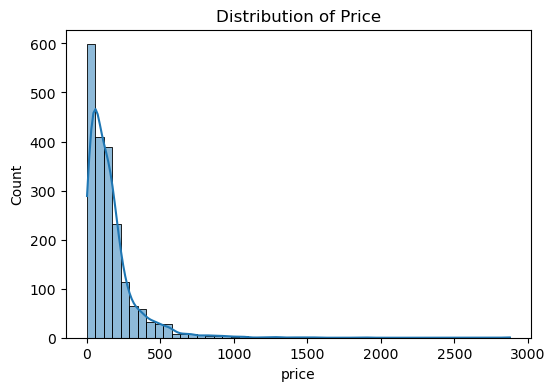

In [12]:
# Distribution of prices
plt.figure(figsize=(6,4))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Distribution of Price")
plt.show()

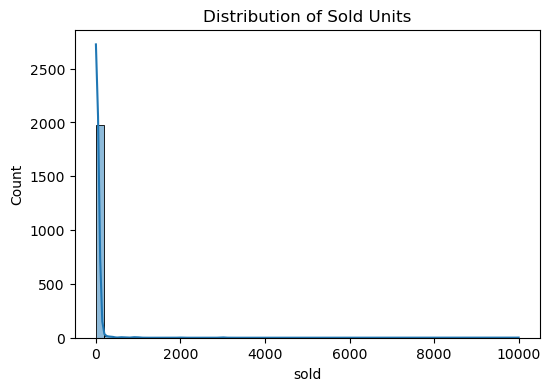

In [13]:
# Distribution of sold
plt.figure(figsize=(6,4))
sns.histplot(df['sold'], bins=50, kde=True)
plt.title("Distribution of Sold Units")
plt.show()

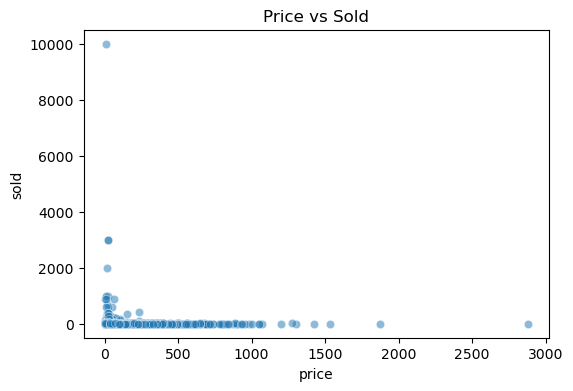

In [14]:
# Relationship between price and sold
plt.figure(figsize=(6,4))
sns.scatterplot(x='price', y='sold', data=df, alpha=0.5)
plt.title("Price vs Sold")
plt.show()

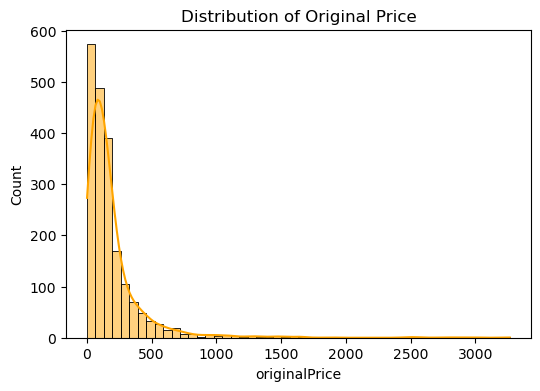

In [16]:
plt.figure(figsize=(6,4))
sns.histplot(df['originalPrice'], bins=50, kde=True, color="orange")
plt.title("Distribution of Original Price")
plt.show()

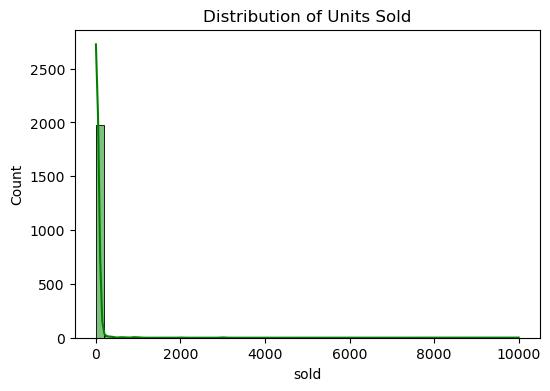

In [17]:
plt.figure(figsize=(6,4))
sns.histplot(df['sold'], bins=50, kde=True, color="green")
plt.title("Distribution of Units Sold")
plt.show()

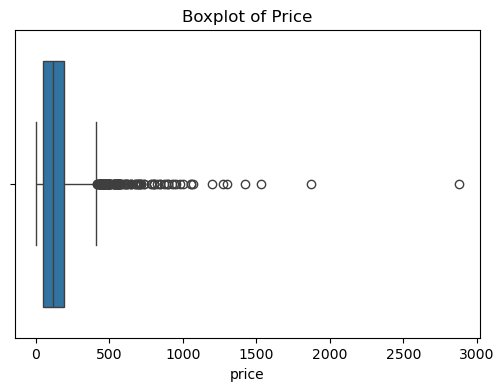

In [18]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['price'])
plt.title("Boxplot of Price")
plt.show()


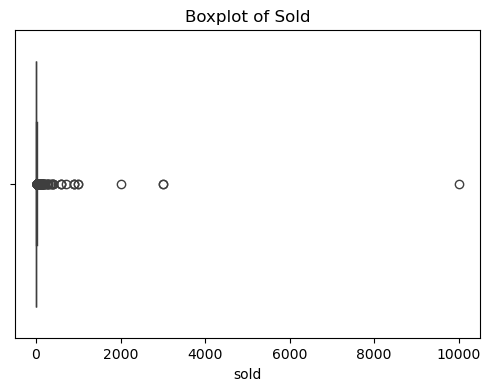

In [19]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['sold'])
plt.title("Boxplot of Sold")
plt.show()

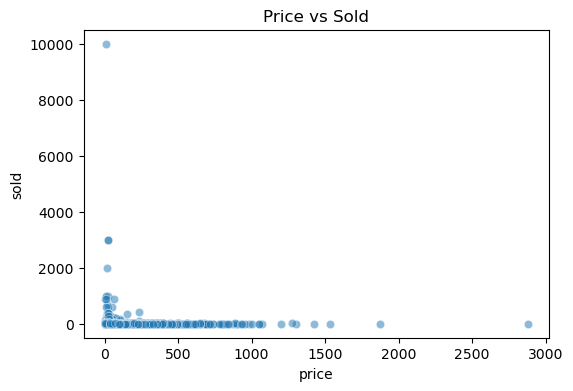

In [20]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='price', y='sold', data=df, alpha=0.5)
plt.title("Price vs Sold")
plt.show()

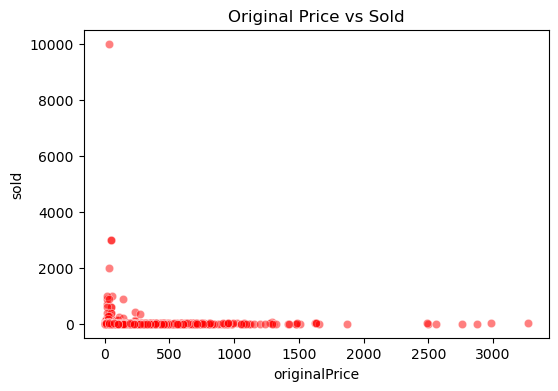

In [21]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='originalPrice', y='sold', data=df, alpha=0.5, color="red")
plt.title("Original Price vs Sold")
plt.show()

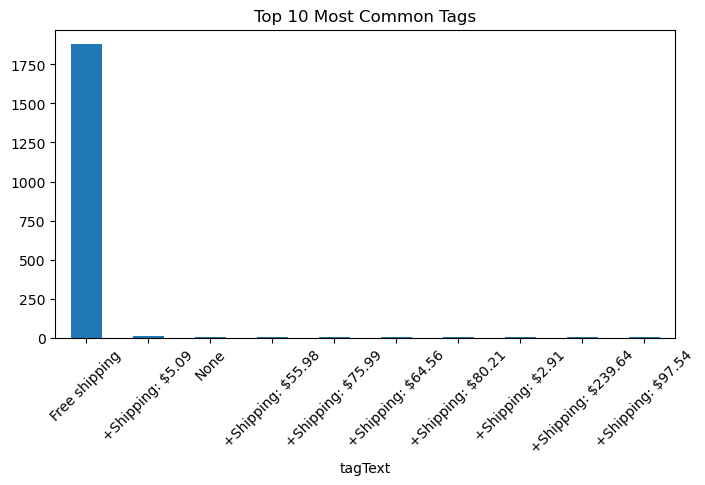

In [22]:
plt.figure(figsize=(8,4))
df['tagText'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Most Common Tags")
plt.xticks(rotation=45)
plt.show()

## Step 4: Feature Engineering



In [23]:

from sklearn.preprocessing import LabelEncoder

df['title_length'] = df['productTitle'].apply(lambda x: len(str(x)))




In [24]:

df['discount_percent'] = ((df['originalPrice'] - df['price']) / df['originalPrice']) * 100


le = LabelEncoder()
df['tag_encoded'] = le.fit_transform(df['tagText'])



In [25]:

features = ['price', 'originalPrice', 'title_length', 'discount_percent', 'tag_encoded']
target = 'sold'


In [26]:

X = df[features]
y = df[target]

display(X.head())

,price,originalPrice,title_length,discount_percent,tag_encoded
0,46.79,46.79,127,0.000000,99
1,169.72,169.72,127,0.000000,99
2,39.46,78.40,124,49.668367,99
3,111.99,111.99,128,0.000000,99
4,21.37,48.82,121,56.226956,99


## Step 5: Model Selection & Training

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [29]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [30]:
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Step 6: Model Evaluation

In [31]:
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt

In [32]:
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

In [33]:
print(" Linear Regression")
print("R² Score:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))

 Linear Regression
R² Score: 0.0057688294041368104
MAE: 29.66133189872582


In [34]:
print("\n Random Forest Regressor")
print("R² Score:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))


 Random Forest Regressor
R² Score: -8.365222802112406
MAE: 42.269165


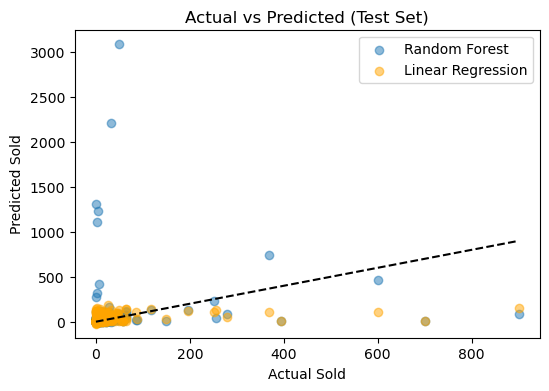

In [35]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_rf, alpha=0.5, label="Random Forest")
plt.scatter(y_test, y_pred_lr, alpha=0.5, label="Linear Regression", color="orange")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')  # reference line
plt.xlabel("Actual Sold")
plt.ylabel("Predicted Sold")
plt.title("Actual vs Predicted (Test Set)")
plt.legend()
plt.show()


# Step 7: Conclusion  

This project explored **AliExpress furniture sales data (2,000 products)** to analyze pricing, discounts, and sales trends, with the goal of predicting the number of items sold (`sold`).  

---

##  Key Findings from EDA  
- **Price Distribution:** Most furniture products are priced at the lower range, but a few high-value items create skewness.  
- **Sales Distribution:** Majority of products have low sales; only a few are high-sellers (long-tail effect).  
- **Outliers:** Clear outliers exist in both `price` and `sold`, showing a few extreme cases of very expensive items or very high sales.  
- **Discounts:** While discounts exist, their direct impact on sales is not strongly visible from the current dataset.  
- **Tags:** "Free shipping" and similar tags are common, but not sufficient alone to explain sales performance.  

---

##  Model Performance  
Two baseline models were tested to predict sales:  

- **Linear Regression**  
  - R² Score: **0.0057** (almost no explanatory power)  
  - MAE: **29.66** (on average, prediction error is ~30 units)  

- **Random Forest Regressor**  
  - R² Score: **-8.36** (performed worse than baseline)  
  - MAE: **42.26** (higher error than Linear Regression)  

Both models performed **poorly**, indicating that the chosen features (`price`, `originalPrice`, `discount`, `tagText`, `title_length`) are **not strong predictors** of sales.  

---

##  Insights & Recommendations  
- **Product attributes alone are not enough**: Sales depend on external factors such as brand trust, customer reviews, product ratings, seasonality, and marketing campaigns.  
- **NLP features are crucial**: Rich information in `productTitle` and `tagText` should be extracted using **TF-IDF or word embeddings** instead of simple encoding.  
- **Outliers affect models**: Removing or handling extreme values in `sold` and `price` could improve performance.  
- **Better models can be tried**: Gradient Boosting (XGBoost, LightGBM, CatBoost) with hyperparameter tuning may yield stronger results.  
- **Business takeaway**: Pricing and discounts alone don’t guarantee high sales — customer perception, product quality, and visibility matter more.  



##  Future Work  
- Perform **text analysis on product titles** (keywords like “modern”, “wooden”, “luxury” may correlate with higher/lower sales).  
- Add **customer-centric features** such as ratings, reviews, and seller reputation.  
- Incorporate **time-series/seasonality effects** if date-based sales data becomes available.  
- Explore **category-level analysis** (e.g., chairs vs tables vs sofas).  


